In [4]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
df=pd.read_csv("/home/kavya/Downloads/disney_plus_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


In [5]:
#perform text Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1368 non-null   object
 1   type          1368 non-null   object
 2   title         1368 non-null   object
 3   director      928 non-null    object
 4   cast          1194 non-null   object
 5   country       1193 non-null   object
 6   date_added    1365 non-null   object
 7   release_year  1368 non-null   int64 
 8   rating        1366 non-null   object
 9   duration      1368 non-null   object
 10  listed_in     1368 non-null   object
 11  description   1368 non-null   object
dtypes: int64(1), object(11)
memory usage: 128.4+ KB


In [6]:
#null values
df.isnull().sum()

show_id           0
type              0
title             0
director        440
cast            174
country         175
date_added        3
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64

In [7]:
df.describe()

,release_year
count,1368.000000
mean,2002.348684
std,22.127559
min,1928.000000
25%,1998.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


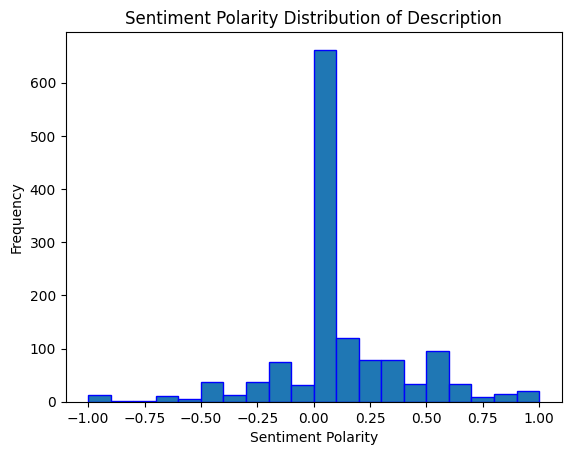

count    1368.000000
mean        0.098366
std         0.296196
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.250000
max         1.000000
Name: description_sentiment, dtype: float64


In [8]:
#Cluster Analysis Based on Type and Rating
if 'title' in df.columns and 'description' in df.columns:
    df['description_sentiment']=df['description'].apply(lambda x: TextBlob(x).sentiment.polarity)
    plt.hist(df['description_sentiment'],bins=20,edgecolor='b')
    plt.title('Sentiment Polarity Distribution of Description')
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Frequency')
    plt.show()
    print(df['description_sentiment'].describe())
else:
    print("Columns 'title'or 'description' not found in the dataset.")

/home/kavya/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


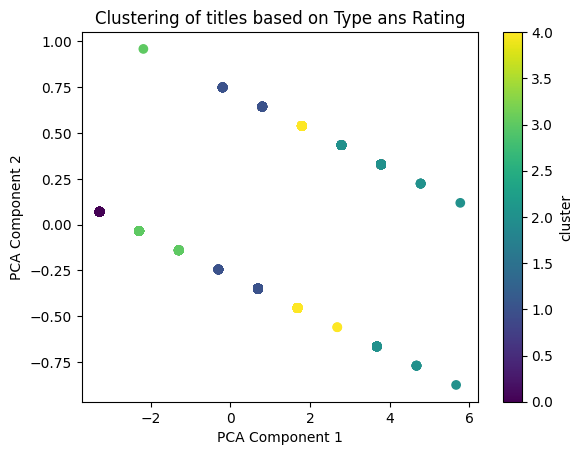

cluster centers:
 [[-3.33066907e-16  0.00000000e+00]
 [ 3.13984169e-01  3.81002639e+00]
 [ 7.73684211e-01  6.84210526e+00]
 [ 3.48432056e-03  1.20905923e+00]
 [ 3.97111913e-01  5.00722022e+00]]

Count of titles in Each Cluster:
cluster
0    235
1    379
2    190
3    287
4    277
Name: count, dtype: int64

Top Types and Ratings in Each Cluster:

Cluster 0:
Top_Types:
type
Movie    235
Name: count, dtype: int64
Top_Ratings
rating
G    235
Name: count, dtype: int64

Cluster 1:
Top_Types:
type
Movie      260
TV Show    119
Name: count, dtype: int64
Top_Ratings
rating
TV-G     307
TV-14     72
Name: count, dtype: int64

Cluster 2:
Top_Types:
type
TV Show    147
Movie       43
Name: count, dtype: int64
Top_Ratings
rating
TV-Y7       130
TV-Y         46
TV-Y7-FV     12
Name: count, dtype: int64

Cluster 3:
Top_Types:
type
Movie      286
TV Show      1
Name: count, dtype: int64
Top_Ratings
rating
PG       227
PG-13     60
Name: count, dtype: int64

Cluster 4:
Top_Types:
type
Movie      167
TV

In [9]:
#Time series Analysis- Trend Analysis Based on Date Added
if 'title' in df.columns and 'rating' in df.columns:
    le_type=LabelEncoder()
    le_rating=LabelEncoder()
    df['type_encoded']=le_type.fit_transform(df['type'])
    df['rating_encoded']=le_rating.fit_transform(df['rating'].astype(str))
    X=df[['type_encoded','rating_encoded']].dropna()
    kmeans=KMeans(n_clusters=5,random_state=42)
    df['cluster']=kmeans.fit_predict(X)
    pca=PCA(n_components=2)
    X_pca=pca.fit_transform(X)
    plt.scatter(X_pca[:,0],X_pca[:,1],c=df['cluster'],cmap='viridis')
    plt.title('Clustering of titles based on Type ans Rating')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='cluster')
    plt.show()
    print("cluster centers:\n",kmeans.cluster_centers_)
    cluster_counts=df['cluster'].value_counts().sort_index()
    print("\nCount of titles in Each Cluster:")
    print(cluster_counts)
    print("\nTop Types and Ratings in Each Cluster:")
    for cluster in range(5):
        cluster_data=df[df['cluster']==cluster]
        top_types=cluster_data['type'].value_counts().head(3)
        top_ratings=cluster_data['rating'].value_counts().head(3)
        print(f"\nCluster {cluster}:")
        print("Top_Types:")
        print(top_types)
        print("Top_Ratings")
        print(top_ratings)
else:
    print("Columns 'type' or 'rating' not found in the dataset.")

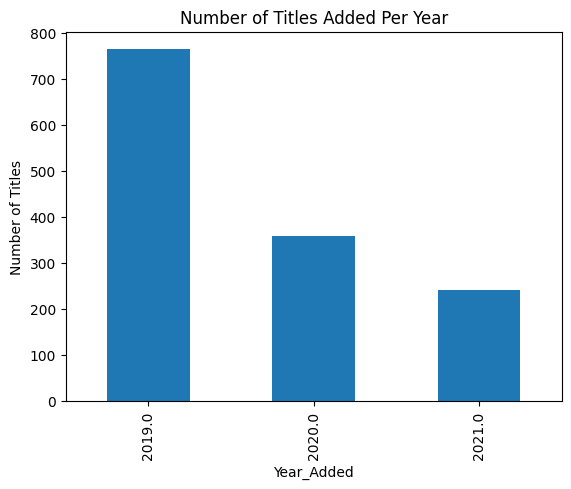

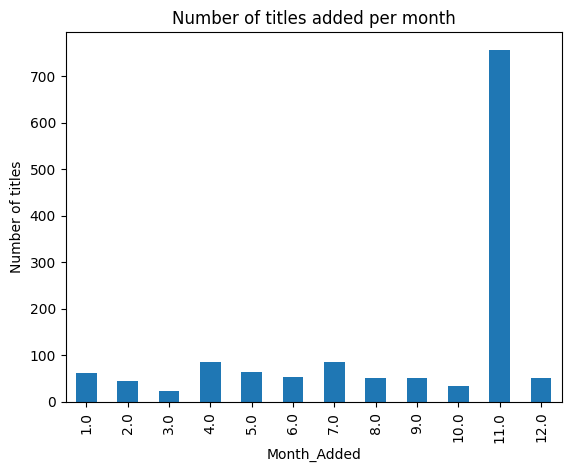

In [10]:
#trend Analysis
if 'date_added' in df.columns:
    df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')
    df['year_added']=df['date_added'].dt.year
    df['month_added']=df['date_added'].dt.month
    df.groupby('year_added').size().plot(kind='bar')
    plt.title('Number of Titles Added Per Year')
    plt.xlabel('Year_Added')
    plt.ylabel('Number of Titles')
    plt.show()
    df.groupby("month_added").size().plot(kind='bar')
    plt.title("Number of titles added per month")
    plt.xlabel('Month_Added')
    plt.ylabel("Number of titles")
    plt.show()
else:
    print("column 'date_added' not found in dataset.")

In [12]:
#Saving the processed data
df.to_csv("/home/kavya/Downloads/disney_plus_titles.csv")
print("processed data saved to 'disney_plus_titles_processed_csv'")

processed data saved to 'disney_plus_titles_processed_csv'


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/home/kavya/Downloads/disney_plus_titles.csv")

df['date_added'] = pd.to_datetime(df [ 'date_added'], errors='coerce')

df = df.dropna(subset=['date_added'])

df.set_index ('date_added', inplace=True)

monthly_titles =df.resample ('M'). size ()
monthly_titles.head ()

date_added
2019-10-31      9
2019-11-30    731
2019-12-31     25
2020-01-31     44
2020-02-29     20
Freq: M, dtype: int64

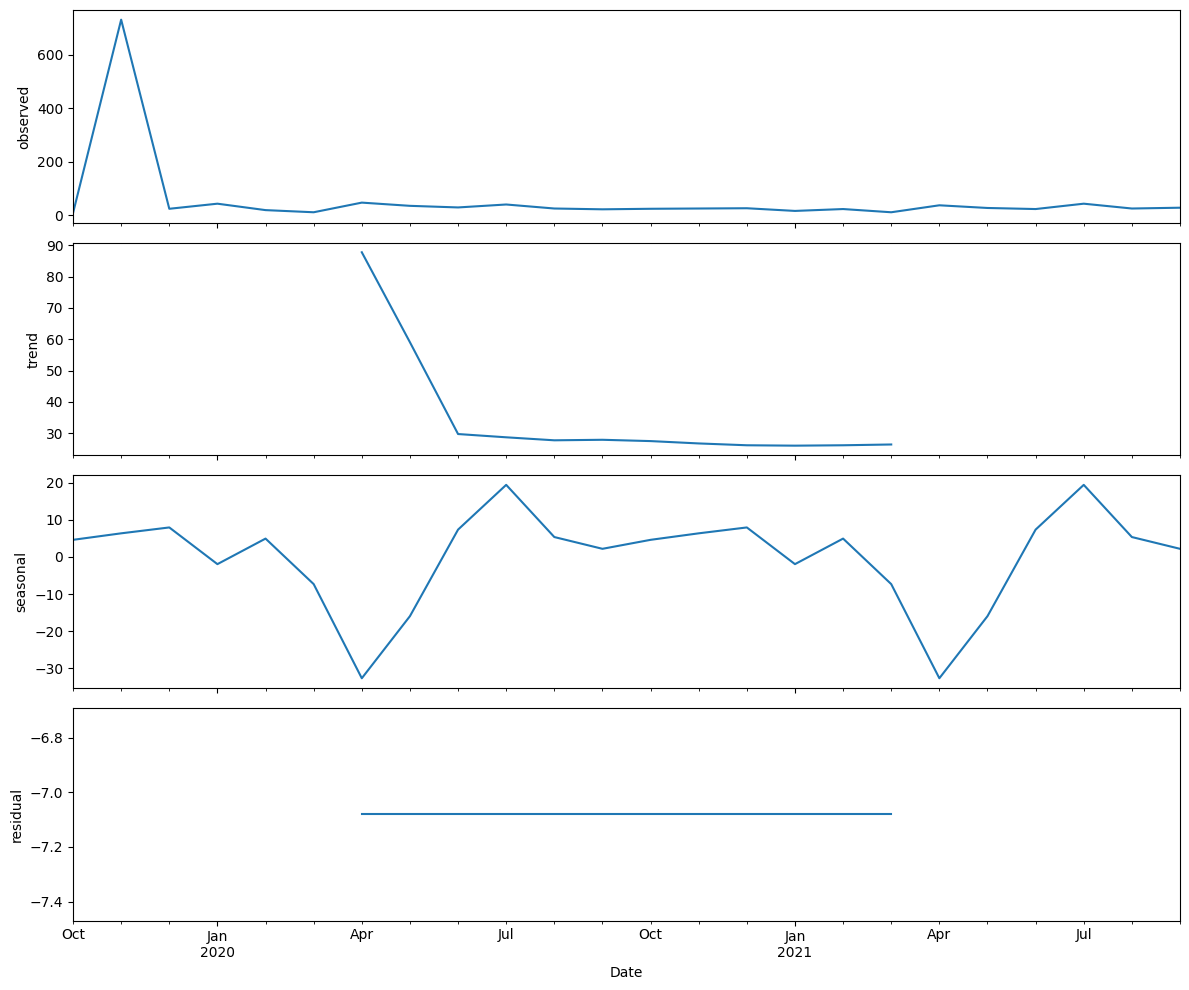

In [4]:
decomposition=seasonal_decompose(monthly_titles,model='additive')
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(12,10),sharex=True)
decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('observed')

decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('trend')

decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('seasonal')

decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('residual')

plt.xlabel('Date')
plt.tight_layout ()
plt.show ()

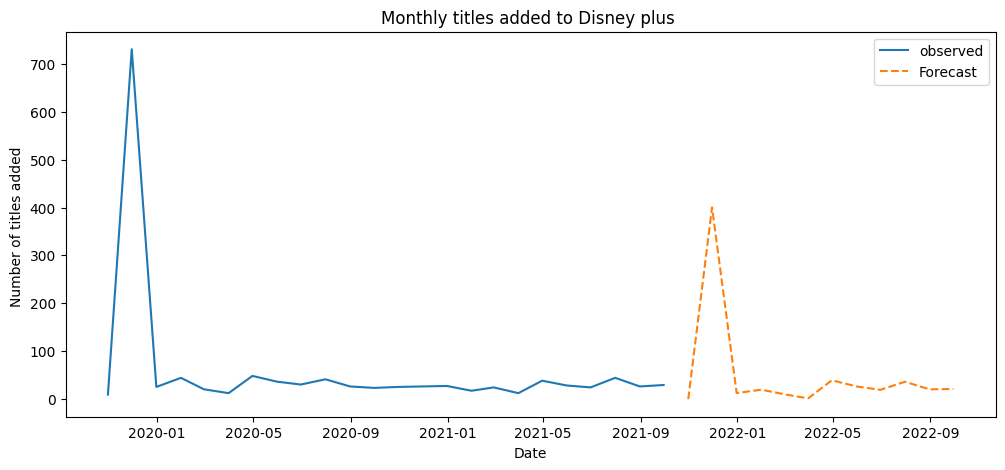

In [5]:
model = ExponentialSmoothing ( monthly_titles, seasonal='add' , seasonal_periods=12)
fit=model.fit()

forecast =fit.forecast(12)

plt.figure(figsize=(12,5))
plt.plot(monthly_titles, label='observed')
plt.plot(forecast, label ='Forecast', linestyle ='--')
plt.xlabel ('Date')
plt.ylabel ('Number of titles added ')
plt.title('Monthly titles added to Disney plus ')
plt.legend()
plt.show()